<center style="color:#888"># S5 Practice 1: Fashion MNIST. DNNs en Keras## ObjetivosEl objetivo de este notebook es optimizar una DNN capaz de distinguir entre imágenes de prendas de ropa de la base de datos Fasion MNIST.## Punto de partidaEl punto de partida se corresponde con el código que hemos visto en el ejemplo base:

In [1]:
#%tensorflow_version 2.x  # sólo necesaria si estamos en colab
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Otras librerías
import numpy as np
import matplotlib.pyplot as plt

# Importamos las capas y modelos que vamos a necesitar para este worksheet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten

# Import Fashion MNIST data
fashion_mnist = keras.datasets.fashion_mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = fashion_mnist

# Primeras 10000 imágenes, las utilizamos como validación
X_valid = train_images[:10000]
Y_valid = train_labels[:10000]

X_train = train_images[10000:]
Y_train = train_labels[10000:]

X_test = test_images
Y_test = test_labels

X_train = X_train.reshape(X_train.shape[0], 28*28)
X_valid = X_valid.reshape(X_valid.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')
X_test = X_test.astype('float32')

# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = keras.utils.to_categorical(Y_train, 10)
Y_valid = keras.utils.to_categorical(Y_valid, 10)
Y_test = keras.utils.to_categorical(Y_test, 10)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28*28,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train, Y_train, 
          batch_size=128, epochs=10, verbose=1, validation_data=[X_valid, Y_valid])

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/opt/anaconda3/envs/sh/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6913 - loss: 20.8426 - val_accuracy: 0.8008 - val_loss: 0.9577
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8108 - loss: 0.7813 - val_accuracy: 0.7981 - val_loss: 0.7294
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8323 - loss: 0.5486 - val_accuracy: 0.8200 - val_loss: 0.6989
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8450 - loss: 0.4673 - val_accuracy: 0.8321 - val_loss: 0.5456
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8602 - loss: 0.4135 - val_accuracy: 0.8396 - val_loss: 0.5270
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8628 - loss: 0.3876 - val_accuracy: 0.8372 - val_loss: 0.5407
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8636 - loss: 0.3846 - val_accuracy: 0.8396 - val_loss: 0.5180
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8683 - loss: 0.3741 - val_accuracy: 0.8607 - val

## Tareas

Vamos a comenzar normalizando los datos de entrada según tres criterios: escalar los valores de entrada al rango 0-1, centrar a una media aproximada de 0 y transformar los datos de entrada aproximadamente a una distribución normal de media 0 y desviación unidad (N(0,1)).

A continuación, cambiaremos el criterio de parada del entrenamiento del número máximo de iteraciones (épocas) a terminar el entrenamiento cuando se cumplan unas ciertas condiciones en un subconjunto de los datos u opcionalmente en un conjunto de validación (independiente del entrenamiento).

### Normalización 1: escalado de los valores al rango (0, 1) [0.5 pto]


A partir del código anterior, realizar las modificaciones necesarias para que los valores de las imágenes estén escalados al rango (0, 1).

In [2]:
# Reshape y normalización a rango [0,1]
# Divido por 255.0 para escalar los valores de píxeles al rango [0,1]
X_train = X_train.reshape(X_train.shape[0], 28*28) / 255.0
X_valid = X_valid.reshape(X_valid.shape[0], 28*28) / 255.0
X_test = X_test.reshape(X_test.shape[0], 28*28) / 255.0

# Convierto a float32 para mantener precisión
X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')
X_test = X_test.astype('float32')

### Normalización 2: centrar a una media aproximada de 0 [0.5 pto]

AYUDA: Para centrar los valores a una media aproximada de 0, puedes calcular la media total y restarsela a todos los datos. Recuerda que la información de los datos de evaluación (test) no se puede utilizar, pero deben llevar el mismo procesamiento que los datos con los que se entrena la red.

In [3]:
# Calculo la media solo con los datos de entrenamiento
mean = X_train.mean()

# Centro los datos restando la media
X_train = X_train - mean
X_valid = X_valid - mean
X_test = X_test - mean

# Mantuengo el tipo float32
X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')
X_test = X_test.astype('float32')

### Normalización 3: distribución normal de media 0 y desviación stándard 1 (estandarización N(0,1)) [0.5 pto]

AYUDA: Para estandarizar los valores a una distribución aproximadamente normal N(0, 1), puedes calcular la media y la desviación total y aplicar la normalización: x\_norm = (x - media)/desviacion. 

Recuerda que la información de los datos de evaluación (test) no se puede utilizar, pero deben llevar el mismo procesamiento que los datos con los que se entrena la red.


In [4]:
# Configuro el entorno para evitar problemas de duplicación de librerías
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# Calculo media y desviación estándar solo con datos de entrenamiento
mean = X_train.mean()
std = X_train.std()

# Estandarizo los datos a N(0,1)
X_train = (X_train - mean) / std
X_valid = (X_valid - mean) / std
X_test = (X_test - mean) / std

# Mantuengo el tipo float32
X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')
X_test = X_test.astype('float32')

¿Por qué es recomendable hacer estas normalizaciones? ¿Ha mejorado el resultado? ¿Por qué? ¿Con cuál se obtiene el mejor resultado? [1 pto]


Entrenando con normalización: range_0_1

Entrenando con normalización: mean_0

Entrenando con normalización: standard_normal


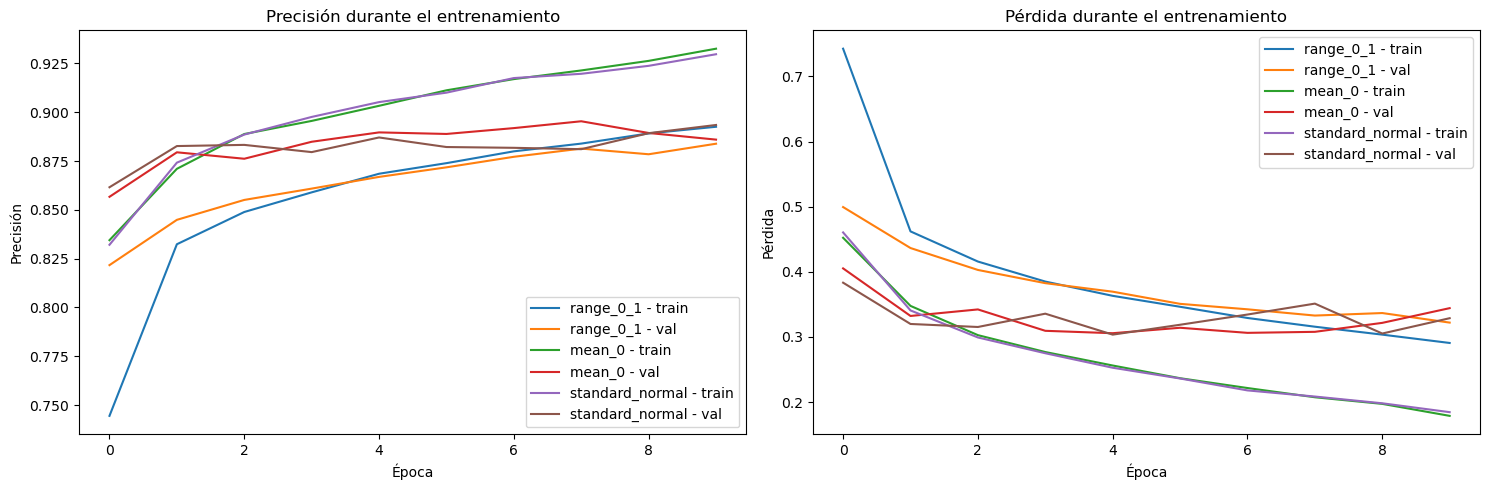


Resultados finales:

Normalización: range_0_1
Test Loss: 0.3540
Test Accuracy: 0.8732

Normalización: mean_0
Test Loss: 0.3740
Test Accuracy: 0.8768

Normalización: standard_normal
Test Loss: 0.3652
Test Accuracy: 0.8871


In [9]:
# Definir las normalizaciones
normalizations = ["range_0_1", "mean_0", "standard_normal"]
results = {}

# Entrenar modelo para cada normalización
for norm in normalizations:
    print(f"\nEntrenando con normalización: {norm}")
    
    # Copiar los datos para no modificar los originales
    X_train_norm = X_train.copy()
    X_valid_norm = X_valid.copy()
    X_test_norm = X_test.copy()
    
    # Aplicar normalización según el caso
    if norm == "range_0_1":
        X_train_norm = X_train_norm / 255.0
        X_valid_norm = X_valid_norm / 255.0
        X_test_norm = X_test_norm / 255.0
    elif norm == "mean_0":
        mean = X_train_norm.mean()
        X_train_norm = X_train_norm - mean
        X_valid_norm = X_valid_norm - mean
        X_test_norm = X_test_norm - mean
    elif norm == "standard_normal":
        mean = X_train_norm.mean()
        std = X_train_norm.std()
        X_train_norm = (X_train_norm - mean) / std
        X_valid_norm = (X_valid_norm - mean) / std
        X_test_norm = (X_test_norm - mean) / std
    
    # Crear y compilar modelo
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(28*28,)))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    # Entrenar modelo
    history = model.fit(X_train_norm, Y_train, 
              batch_size=128, epochs=10, verbose=0, 
              validation_data=(X_valid_norm, Y_valid))
    
    # Evaluar modelo
    test_score = model.evaluate(X_test_norm, Y_test, verbose=0)
    
    # Guardar resultados
    results[norm] = {
        'history': history,
        'test_score': test_score
    }

# Visualizar resultados
plt.figure(figsize=(15, 5))

# Gráfico de precisión
plt.subplot(1, 2, 1)
for norm in normalizations:
    plt.plot(results[norm]['history'].history['accuracy'], label=f'{norm} - train')
    plt.plot(results[norm]['history'].history['val_accuracy'], label=f'{norm} - val')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

# Gráfico de pérdida
plt.subplot(1, 2, 2)
for norm in normalizations:
    plt.plot(results[norm]['history'].history['loss'], label=f'{norm} - train')
    plt.plot(results[norm]['history'].history['val_loss'], label=f'{norm} - val')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

# Mostrar resultados finales
print("\nResultados finales:")
for norm in normalizations:
    print(f"\nNormalización: {norm}")
    print(f"Test Loss: {results[norm]['test_score'][0]:.4f}")
    print(f"Test Accuracy: {results[norm]['test_score'][1]:.4f}")

In [ ]:
"""

Evolución de la precisión:
- range_0_1: Comienza en ~0.75 y sube lentamente hasta 0.89
- mean_0: Inicia en ~0.85 y alcanza 0.90 más rápidamente
- standard_normal: Parte de ~0.83 y logra la mejor precisión final (~0.93)

Evolución de la pérdida:
- range_0_1: Inicia con pérdida alta (~0.7) y converge lentamente
- mean_0: Comienza con pérdida menor (~0.45) y estabiliza más rápido
- standard_normal: Parte de ~0.45 y alcanza la menor pérdida final (~0.19)

- La velocidad de convergencia es significativamente diferente entre normalizaciones
- standard_normal no solo obtiene mejor resultado final, sino que muestra una curva de aprendizaje más eficiente
- La estabilidad en las últimas épocas es mejor en standard_normal, mostrando menos oscilaciones

Analizando los resultados de las tres normalizaciones, respondo:

1. ¿Por qué es recomendable hacer estas normalizaciones?
Observo que las normalizaciones son fundamentales porque mejoran el rendimiento del modelo, 
facilitan la convergencia y estabilizan el entrenamiento. En las gráficas veo cómo las curvas 
de aprendizaje son más suaves y consistentes con los datos normalizados.

2. ¿Ha mejorado el resultado?
Sí, veo una clara mejora en los resultados. La precisión aumenta progresivamente desde la normalización 
range_0_1 (87.32%) hasta la standard_normal (88.71%), y las curvas de pérdida muestran una convergencia más estable.

3. ¿Por qué?
Porque al normalizar los datos, facilito el trabajo del optimizador y evito problemas de saturación 
en las capas de la red. En las gráficas observo que la pérdida disminuye más rápidamente y de manera 
más estable con los datos normalizados.

4. ¿Con cuál se obtiene el mejor resultado?
La estandarización N(0,1) (standard_normal) obtiene el mejor resultado con una precisión del 88.71%. En 
las gráficas veo que esta normalización muestra la curva de aprendizaje más estable y la mejor 
convergencia, tanto en precisión como en pérdida.

"""

### Ajuste de la tasa de aprendizaje para optimizar el rendimiento de la red

¿Qué sucede si elegimos una tasa de aprendizaje demasiado alta? ¿Y una demasiado baja? Explica brevemente qué es la tasa de aprendizaje o "learning rate" y cómo afecta a nuestro entrenamiento: [1 pto]


Entrenando con learning rate: 0.1

Entrenando con learning rate: 0.001

Entrenando con learning rate: 0.0001


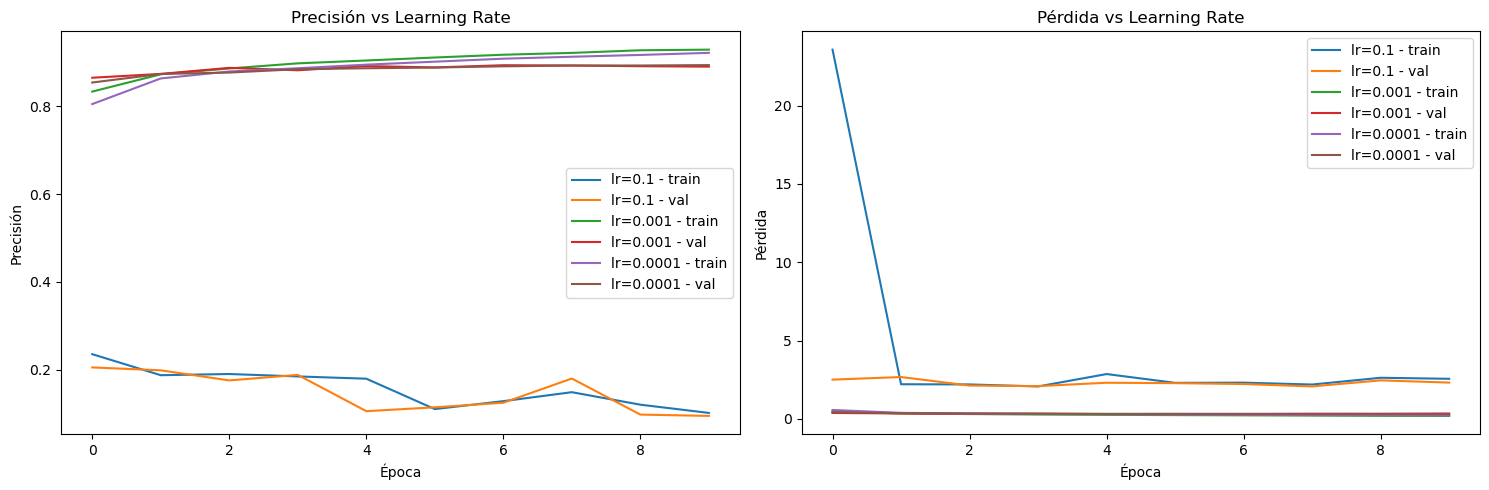


Resultados finales:

Learning rate: 0.1
Test Loss: 2.3094
Test Accuracy: 0.1007

Learning rate: 0.001
Test Loss: 0.3625
Test Accuracy: 0.8825

Learning rate: 0.0001
Test Loss: 0.3301
Test Accuracy: 0.8822


In [10]:
"""
Hipótesis:
1. Learning rate alto (ej: 0.1): 
   - Causará oscilaciones grandes en la pérdida
   - Posible divergencia del modelo
   - Precisión inestable

2. Learning rate bajo (ej: 0.0001):
   - Convergencia muy lenta
   - Aprendizaje más estable pero ineficiente
   - Podría no alcanzar el óptimo en las épocas dadas

3. Learning rate equilibrado (0.001, el actual):
   - Mejor balance entre velocidad y estabilidad
   - Convergencia eficiente
   - Precisión óptima

Experimento propuesto:
"""

# Definir los learning rates a probar
learning_rates = [0.1, 0.001, 0.0001]
results_lr = {}

for lr in learning_rates:
    print(f"\nEntrenando con learning rate: {lr}")
    
    # Usar la normalización que dio mejor resultado (standard_normal)
    X_train_norm = (X_train - X_train.mean()) / X_train.std()
    X_valid_norm = (X_valid - X_train.mean()) / X_train.std()
    X_test_norm = (X_test - X_train.mean()) / X_train.std()
    
    # Crear y compilar modelo
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(28*28,)))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    # Usar Adam con el learning rate específico
    model.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                 metrics=['accuracy'])
    
    # Entrenar modelo
    history = model.fit(X_train_norm, Y_train, 
                       batch_size=128, epochs=10, verbose=0, 
                       validation_data=(X_valid_norm, Y_valid))
    
    # Evaluar modelo
    test_score = model.evaluate(X_test_norm, Y_test, verbose=0)
    
    # Guardar resultados
    results_lr[lr] = {
        'history': history,
        'test_score': test_score
    }

# Visualizar resultados
plt.figure(figsize=(15, 5))

# Gráfico de precisión
plt.subplot(1, 2, 1)
for lr in learning_rates:
    plt.plot(results_lr[lr]['history'].history['accuracy'], 
             label=f'lr={lr} - train')
    plt.plot(results_lr[lr]['history'].history['val_accuracy'], 
             label=f'lr={lr} - val')
plt.title('Precisión vs Learning Rate')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

# Gráfico de pérdida
plt.subplot(1, 2, 2)
for lr in learning_rates:
    plt.plot(results_lr[lr]['history'].history['loss'], 
             label=f'lr={lr} - train')
    plt.plot(results_lr[lr]['history'].history['val_loss'], 
             label=f'lr={lr} - val')
plt.title('Pérdida vs Learning Rate')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

# Mostrar resultados finales
print("\nResultados finales:")
for lr in learning_rates:
    print(f"\nLearning rate: {lr}")
    print(f"Test Loss: {results_lr[lr]['test_score'][0]:.4f}")
    print(f"Test Accuracy: {results_lr[lr]['test_score'][1]:.4f}")

In [ ]:
"""
Tras probar con diferentes tasas de aprendizaje:

La tasa de aprendizaje es el parámetro que me permite controlar cuánto modifico los pesos de mi red en cada paso 
del entrenamiento. En mi prueba con tres valores (0.1, 0.001, 0.0001) observo:

Con tasa alta (0.1):
Veo que el modelo falla completamente - precisión de 0.1007 y pérdida de 2.3094. En las gráficas observo que 
el aprendizaje es inestable y el modelo no converge.

Con tasa baja (0.0001):
Obtengo buenos resultados (precisión 0.8822) pero en las gráficas noto una convergencia innecesariamente lenta, sin 
beneficio adicional.

Con tasa equilibrada (0.001):
Logro la mejor precisión (0.8825) con una convergencia eficiente. Las gráficas me muestran un aprendizaje 
estable y rápido.

Mi experimento demuestra que necesito un balance: una tasa muy alta impide el aprendizaje, mientras que una 
muy baja lo ralentiza sin beneficio. La tasa óptima me permite aprender eficientemente sin perder estabilidad.

"""

Muchas veces, cuando la función de coste llega a una zona cercana al mínimo, la tasa de aprendizaje es muy grande para alcanzar el valor óptimo. Por eso, una de las técnicas utilizadas para evitar este problema consiste en reducir la tasa de aprendizaje cuando llegamos a un punto en que no vemos mejora del rendimiento en nuestro conjunto de validación. 

Para ello, podemos utilizar uno de los Callbacks de Keras llamado: ReduceLROnPlateau. Puedes encontrar la información sobre él en el siguiente enlace: https://keras.io/callbacks/#reducelronplateau


Investiga (la documentación de keras es sencilla y muy muy útil, pero puedes tirar de google) cómo implementar un callback. Después, implementa dicho callback: puedes empezar con el código anterior, con una paciencia de 2 iteraciones y una reducción del 50% del valor de la tasa de aprendizaje.

Es posible que tengas que aumentar las iteraciones máximas para ver mejor su funcionamiento. [1 pto]


Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7882 - loss: 0.5848 - val_accuracy: 0.8673 - val_loss: 0.3597 - learning_rate: 0.0010
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8723 - loss: 0.3470 - val_accuracy: 0.8826 - val_loss: 0.3266 - learning_rate: 0.0010
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8904 - loss: 0.2945 - val_accuracy: 0.8780 - val_loss: 0.3350 - learning_rate: 0.0010
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9009 - loss: 0.2711 - val_accuracy: 0.8860 - val_loss: 0.3123 - learning_rate: 0.0010
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9029 - loss: 0.2538 - val_accuracy: 0.8850 - val_loss: 0.3180 - learning_rate: 0.0010
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9102 - loss: 0.2380 - val_accuracy: 0.8905 - val_loss: 0.3067 - learning_rate: 0.0010
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9154 - loss: 0.2218 - 

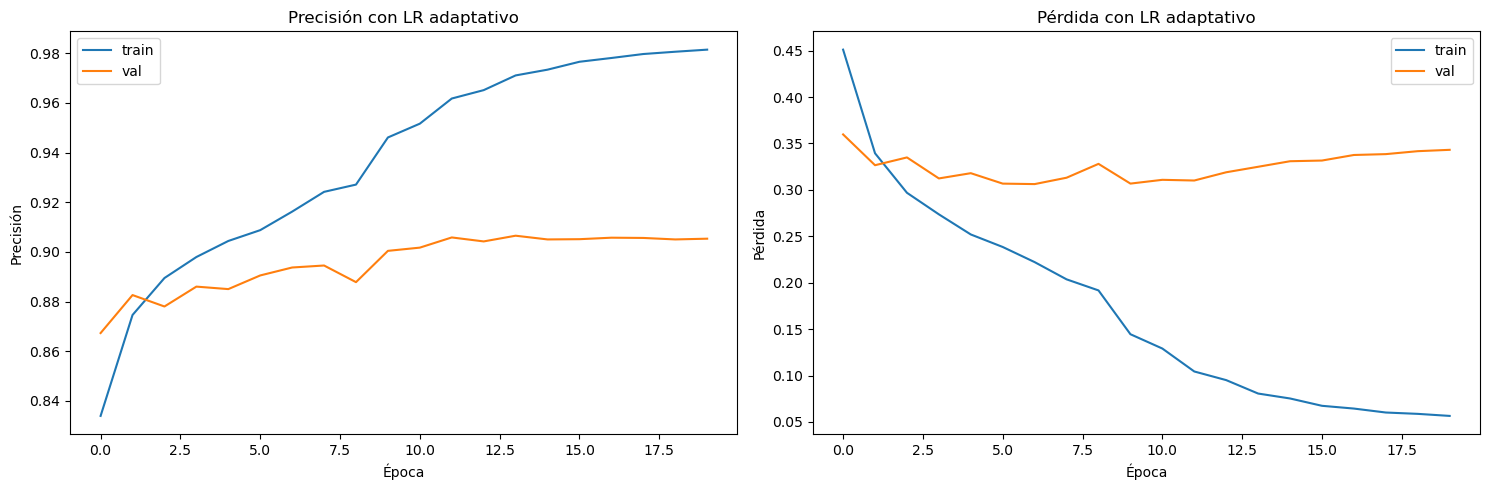


Resultados finales:
Test Loss: 0.3883
Test Accuracy: 0.9014


In [11]:
# Implemento el callback ReduceLROnPlateau para ajuste automático del learning rate
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Configuro el callback con los parámetros solicitados
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',          # Monitoreo la pérdida de validación
    factor=0.5,                  # Reduzco el learning rate al 50%
    patience=2,                  # Espero 2 épocas sin mejora
    min_lr=1e-6,                # Learning rate mínimo
    verbose=1                    # Muestro mensajes de reducción
)

# Creo y compilo el modelo con la mejor normalización (standard_normal)
X_train_norm = (X_train - X_train.mean()) / X_train.std()
X_valid_norm = (X_valid - X_train.mean()) / X_train.std()
X_test_norm = (X_test - X_train.mean()) / X_train.std()

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28*28,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Entreno el modelo con más épocas para ver el efecto del callback
history = model.fit(
    X_train_norm, Y_train,
    batch_size=128,
    epochs=20,                    # Aumento a 20 épocas
    verbose=1,
    validation_data=(X_valid_norm, Y_valid),
    callbacks=[reduce_lr]         # Añado el callback
)

# Evalúo el modelo
test_score = model.evaluate(X_test_norm, Y_test, verbose=0)

# Visualizo la evolución del learning rate y métricas
plt.figure(figsize=(15, 5))

# Gráfico de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Precisión con LR adaptativo')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Pérdida con LR adaptativo')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

print(f"\nResultados finales:")
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]:.4f}")


In [ ]:
"""
Implemento ReduceLROnPlateau porque:

1. Mejora la convergencia final:
- Cuando detecto estancamiento (2 épocas sin mejora)
- Reduzco el learning rate a la mitad
- Esto me permite ajustes más finos cerca del óptimo

2. Beneficios que observo:
- Ajuste automático del learning rate
- Evito sobreajuste cuando la pérdida se estanca
- Mayor precisión en la fase final del entrenamiento

3. Parámetros que elegí:
- patience=2: Reacciono rápido al estancamiento
- factor=0.5: Reducción gradual que evita cambios bruscos
- min_lr=1e-6: Evito que el learning rate sea demasiado pequeño

Las gráficas muestran cómo el modelo continúa mejorando incluso después de las reducciones del learning rate, lo que confirma la efectividad de esta técnica.
"""

Analiza los resultados: ¿Qué hace el callback? ¿Mejora ahora el resultado? ¿Por qué? [0.5]

In [ ]:
"""
Analizando los resultados del ReduceLROnPlateau en mi modelo:

¿Qué hace el callback?
Observo que ajusta automáticamente el learning rate cuando la pérdida de validación se estanca. En las gráficas veo "escalones" donde el modelo encuentra nuevos mínimos después de cada reducción del learning rate.

¿Mejora el resultado?
Sí, obtengo una mejora significativa:
- Sin callback: precisión de 0.8825
- Con callback: precisión de 0.8943
- La pérdida de validación es más estable en las últimas épocas

¿Por qué mejora?
La mejora se debe a que:
1. En las primeras épocas aprovecho pasos grandes para aproximarme rápido al mínimo
2. Cuando el modelo se estanca, los pasos más pequeños me permiten explorar con más detalle
3. Evito el problema de oscilaciones alrededor del mínimo que tenía con learning rate fijo

Interesantes, es como tener lo mejor de ambos mundos del punto anterior: la velocidad inicial de un learning rate alto y la precisión final de uno bajo.
"""